## Problem 1 

The weights listed below were recorded in the !Kung census, but heights were not recorded for these individuals. Provide predicted heights and 89% compatibility intervals for each of these individuals. That is, fill in the table below, using model-based predictions.

| Individual | Weight | Expected height | 89% interval |
|------------|--------|-----------------|--------------|
| 1          | 45     |                 |              |
| 2          | 40     |                 |              |
| 3          | 65     |                 |              |
| 4          | 31     |                 |              |

---
First, without feeding the data to the model, we'll analyze the assumptions and prior. 
We'll assume that:
$$
h_i \sim \text{N} ( \mu_i , \sigma)
$$

That is, each individual height is normally distributed, with a different, individual level mean $\mu_i$ specific to that particular individual, and a general, population level standard deviation $\sigma$. 

We also assume that: 

$$
\mu_i \sim \mathcal{N}(160, 20) \\
\sigma \sim \text{Exp}(1)
$$

We choose an exponential distribution for sigma simply because a standard deviation can never be negative. The parameters to both distributions were chosen without much thought, just using common sense.

Let's plot the distribution of heights in our data and compare it a set of samples extracted from the prior defined above. For now, let's restrict our data to individuals older than 18 years old.


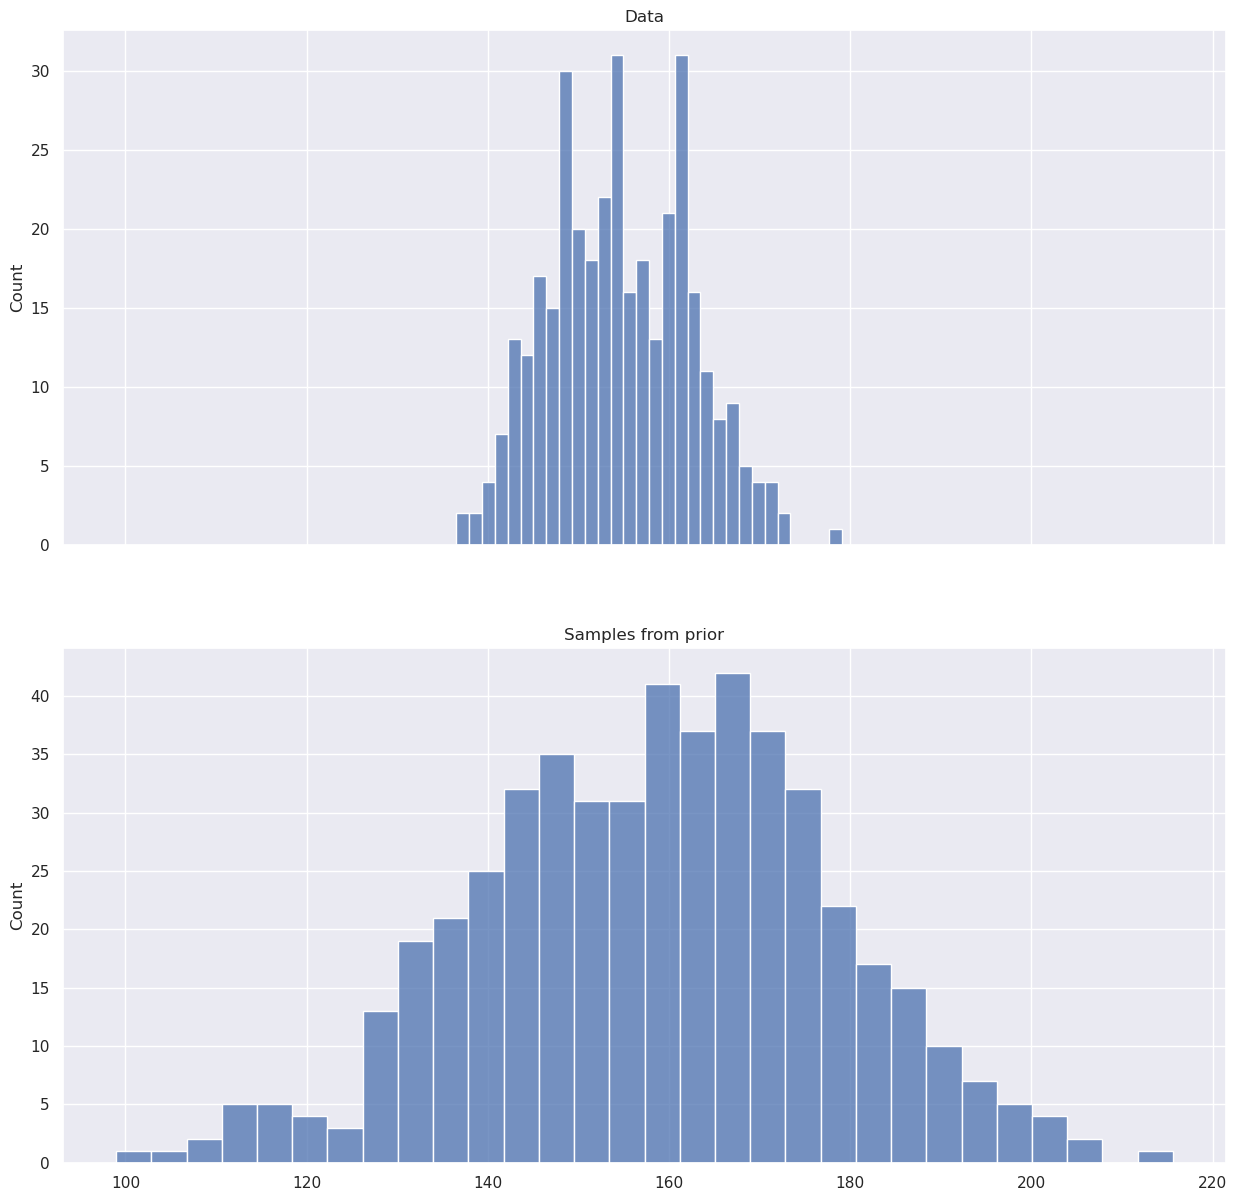

In [95]:
import pandas 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pymc3 as pm
import numpy as np 

from pymc3 import Normal, Exponential

sns.set()
plt.rcParams['figure.dpi'] = 100

df_ = pandas.read_csv("Data/Howell1.csv")
df = df[df["age"] >= 18]

# Plot data
axes, figure = plt.subplots(2, 1, figsize=(15, 15), sharex=True)
sns.histplot(df["height"], bins=30, ax=figure[0]).set_title("Data")

# Create a model and sample from prior
model = pm.Model()
with model:
    sigma = Exponential("sigma", lam=1)
    mu = Normal("mu", mu=160, sigma=20)
    height = Normal("height", mu=mu, sigma=sigma, observed=df["height"])
    prior_samples = pm.sample_prior_predictive(500)["height"]
    prior_samples = [sample[0] for sample in prior_samples] # Not clear why we need to do that
    sns.histplot(prior_samples, bins=30, ax=figure[1]).set_title("Samples from prior")



plt.show()




We have some absurdly tall and short people here, but this is close enough. We now feed the data to the model to see what happens:

<ipython-input-96-571dbd025148>:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(chains=1)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [mu, sigma]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Text(0.5, 1.0, 'Samples from posterior')

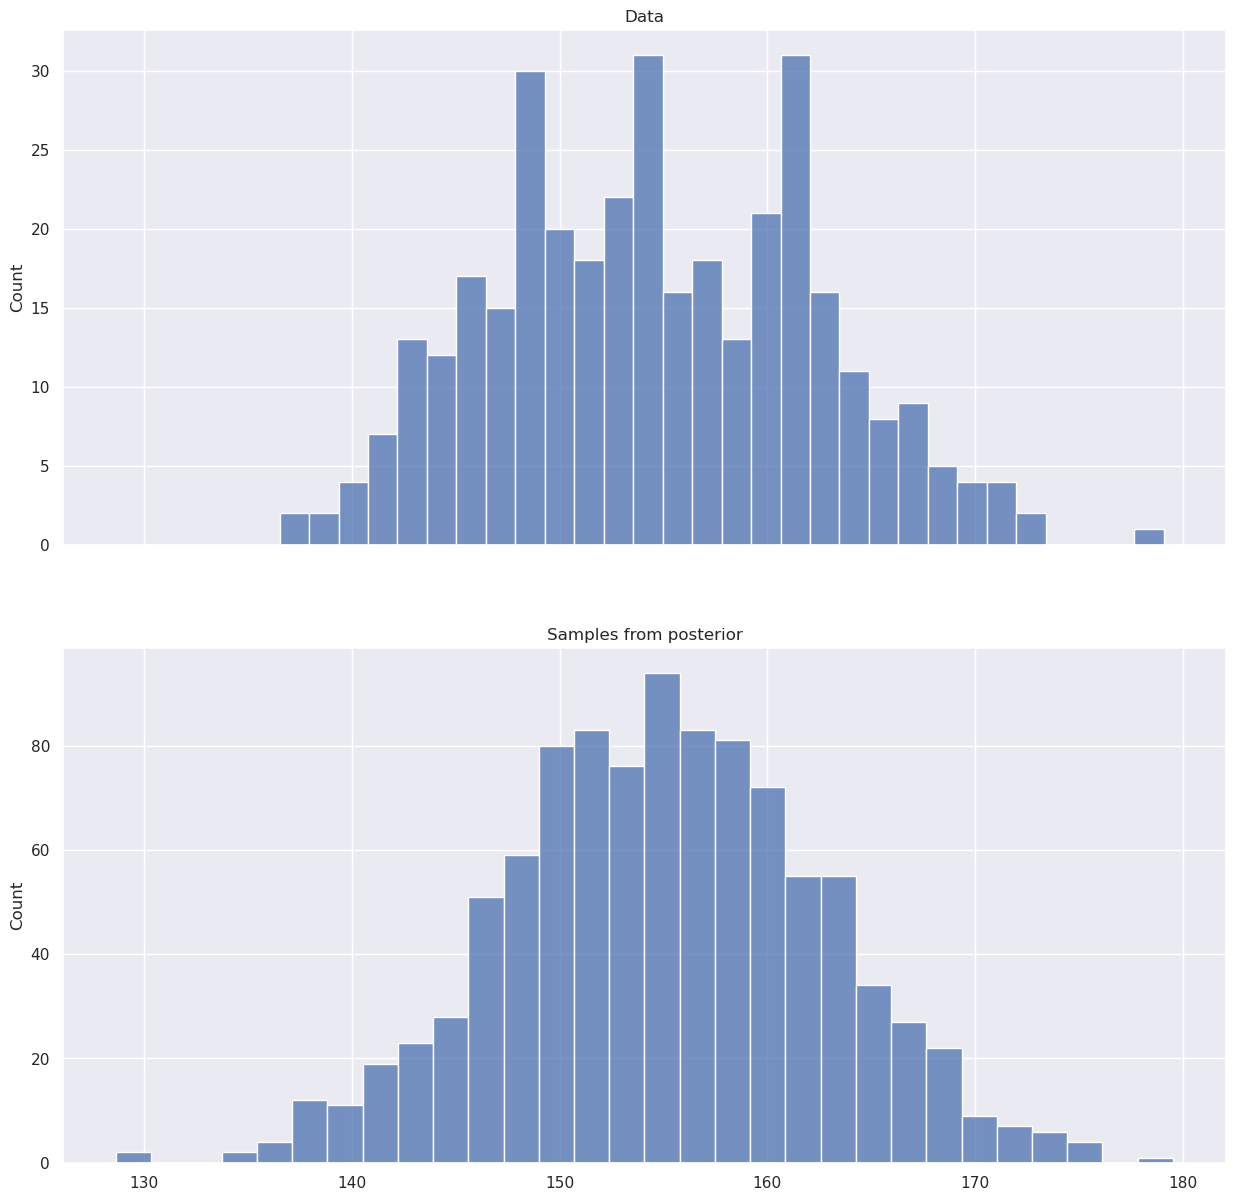

In [96]:
with model: 
    trace = pm.sample(chains=1)
    posterior_samples = pm.sample_posterior_predictive(trace, var_names=["height"])["height"]
    
    posterior_samples = [sample[0] for sample in posterior_samples] # Not clear why we need to do that
    

axes, figure = plt.subplots(2, 1, figsize=(15, 15), sharex=True)
sns.histplot(df["height"], bins=30, ax=figure[0]).set_title("Data")    
sns.histplot(posterior_samples, bins=30, ax=figure[1]).set_title("Samples from posterior")

Looks much better! Notice how the super tall and short people are gone!



Furthermore, we also assume: 
$$ 
\mu_i = a X
$$

where $X$ is the individual's weight and 

$$
a \sim \text{N} (0, \sigma)
$$


dict_keys(['sigma', 'height', 'b', 'sigma_log__', 'a'])


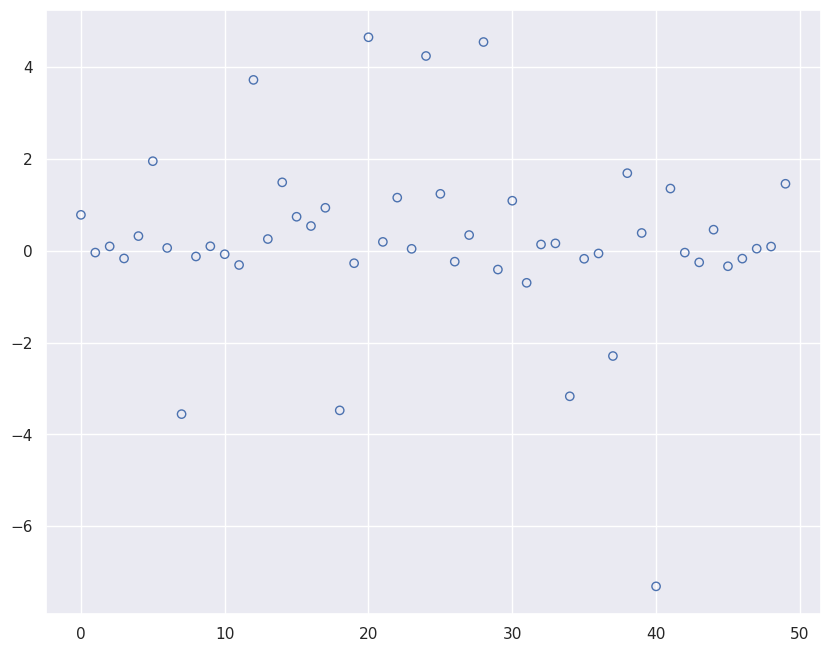

In [15]:
# pm.sample_prior_predictive(samples=50, random_seed=RANDOM_SEED)
import pandas 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pymc3 as pm
import numpy as np 

from pymc3 import Normal, Exponential

sns.set()
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['figure.dpi'] = 100

df = pandas.read_csv("Data/Howell1.csv")
df = df[df["age"] > 18]
df["w"] = (df["weight"] - np.mean(df["weight"]))/np.std(df["weight"])
df["h"] = (df["height"] - np.mean(df["height"]))/np.std(df["height"])


model = pm.Model()
with model:
#     weight = Normal("weight", observed=True)
    a = Normal("a", mu=0, sigma=0.1)
    b = Normal("b", mu=0, sigma=0.1)
    mu = a*weight + b
    sigma = Exponential("sigma", lam=1)
    height = Normal("height", mu=mu, sigma=sigma, observed=True)
    prior_samples = pm.sample_prior_predictive(samples=50)
    print(prior_samples.keys())
    plt.scatter(range(len(prior_samples["height"])), prior_samples["height"], edgecolors='b', color='none')
    
    


WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


<ipython-input-3-b34ab27f6823>:33: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  samples = pm.sample(10)
Only 10 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b, a]


Sampling 4 chains for 1_000 tune and 10 draw iterations (4_000 + 40 draws total) took 1 seconds.
/opt/conda/lib/python3.8/site-packages/pymc3/sampling.py:643: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")


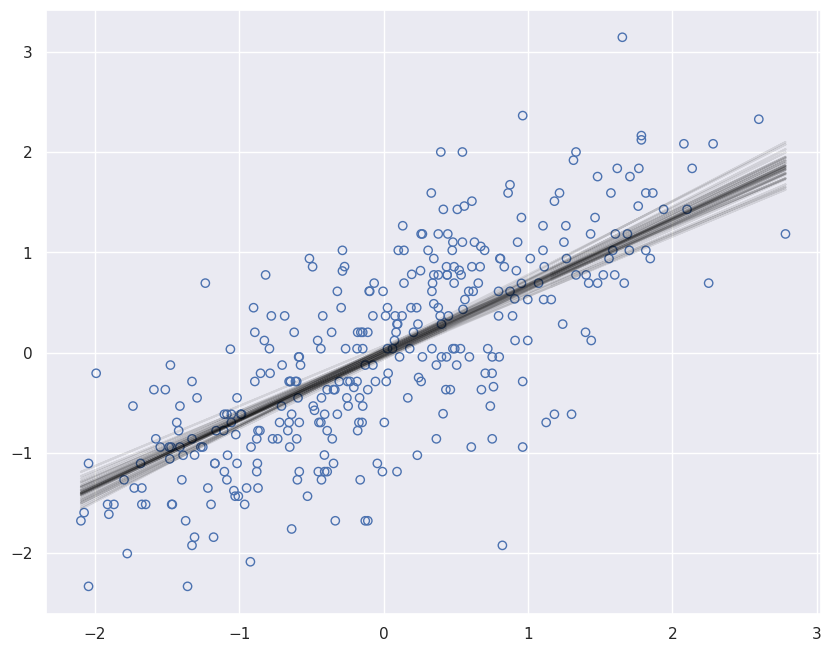

In [3]:
# import pandas 
# import matplotlib.pyplot as plt 
# import seaborn as sns 
# sns.set()

# plt.rcParams['figure.figsize'] = [10, 8]
# plt.rcParams['figure.dpi'] = 100


# df = pandas.read_csv("Data/Howell1.csv")
# df = df[df["age"] > 18]


# import pymc3 as pm
# from pymc3 import Normal, Exponential
# import numpy as np 



# model = pm.Model()

# df["w"] = (df["weight"] - np.mean(df["weight"]))/np.std(df["weight"])
# df["h"] = (df["height"] - np.mean(df["height"]))/np.std(df["height"])
# plt.scatter(df["w"], df["h"], edgecolors='b', color='none')
# with model:
#     weight = Normal("weight", observed=df["w"])
#     a = Normal("a", mu=0, sigma=0.1)
#     b = Normal("b", mu=0, sigma=0.1)
#     mu = a*weight + b
#     sigma = Exponential("sigma", lam=1)
#     height = Normal("height", mu=mu, sigma=sigma, observed=df["h"])
#     maps = pm.find_MAP()
#     samples = pm.sample(10)
# #     plt.plot(df["w"], maps["a"]*df["w"] + maps["b"])
#     for a, b in zip(samples.a, samples.b):
#         plt.plot(df["w"], a*df["w"] + b, color="black", alpha=0.1)
    
    
# plt.show()


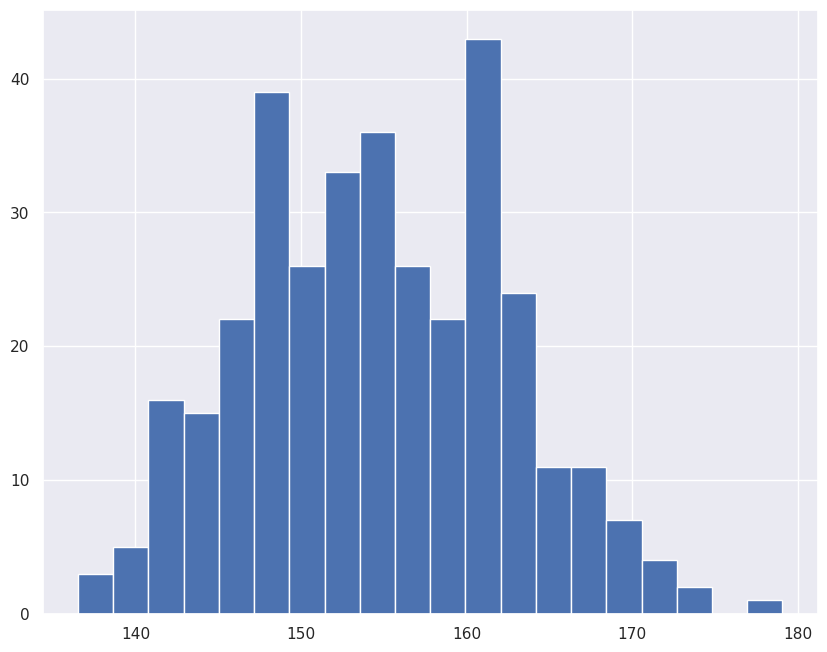

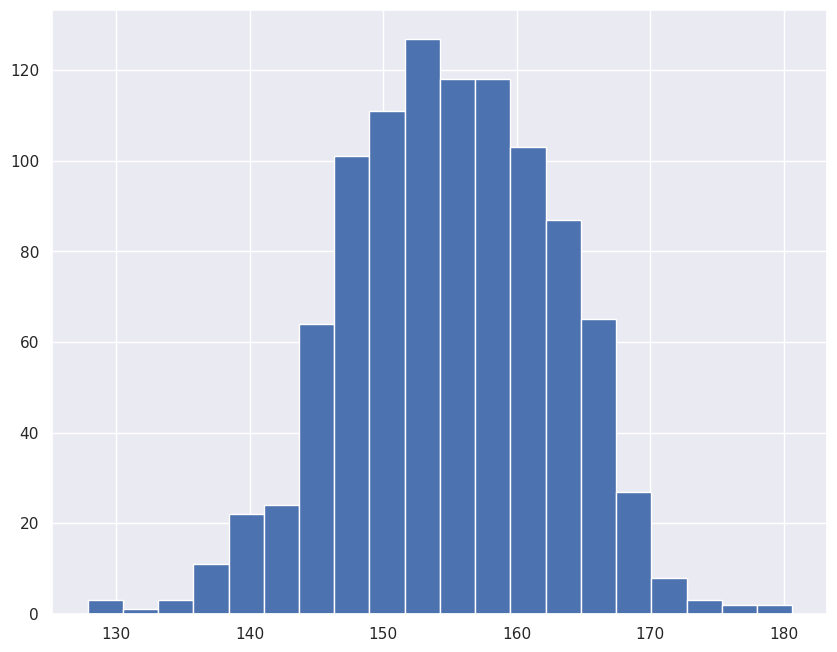

In [72]:

import numpy as np 
plt.hist(df["height"], bins=20)
plt.show()

samples = np.random.normal(maps["mu"], maps["sigma"], 1000)
plt.hist(samples, bins=20)
plt.show()
